In [36]:
# Import neccessary Libraries

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate Data

In [37]:
X_train = np.linspace(-1,1,20)

In [38]:
print(X_train)

[-1.         -0.89473684 -0.78947368 -0.68421053 -0.57894737 -0.47368421
 -0.36842105 -0.26315789 -0.15789474 -0.05263158  0.05263158  0.15789474
  0.26315789  0.36842105  0.47368421  0.57894737  0.68421053  0.78947368
  0.89473684  1.        ]


In [39]:
y_train = np.array([-0.6561, -0.3099, -0.59035, -0.50855, 0.285,
                   -0.243, -0.02445, 0.00135, -0.2006, 0.07475,
                   -0.1422, 0.06515, 0.15265, 0.3521, 0.28415,
                   0.5524, 0.23115, 0.20835, 0.4211, 0.60485])

In [40]:
X_test = np.linspace(-1, 1, 20)

In [41]:
y_test = np.array([-0.69415, -0.451  , -0.43005, -0.4484 , -0.1475 ,
                   -0.5019 , -0.28055,  0.24595, -0.21425, -0.0286 ,  
                   0.23415,  0.46575, 0.07955,  0.1973 ,  0.0719 ,
                   0.3639 ,  0.5536 ,  0.3365 , 0.50705,  0.33435])

In [42]:
print(y_test)

[-0.69415 -0.451   -0.43005 -0.4484  -0.1475  -0.5019  -0.28055  0.24595
 -0.21425 -0.0286   0.23415  0.46575  0.07955  0.1973   0.0719   0.3639
  0.5536   0.3365   0.50705  0.33435]


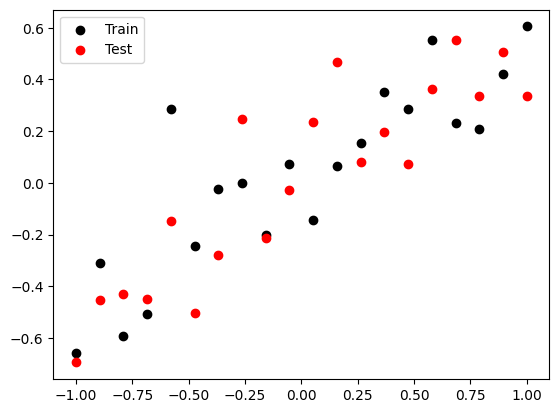

In [43]:
plt.scatter(x=X_train, y=y_train,c='black', label='Train')
plt.scatter(x=X_test, y=y_test ,c='red', label='Test')
plt.legend()
plt.show()

# Regression Model

In [54]:
model = Sequential()
model.add(Input(shape=(1,)))
model.add(Dense(128, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(1, activation="linear"))
adam = Adam(learning_rate=0.01)
model.compile(loss='mse', optimizer=adam, metrics=['mse', 'mae'])
history = model.fit(X_train, y_train, epochs=500, 
                    validation_data = (X_test, y_test),
                    verbose=False)

In [58]:
# evaluate the model
_, train_mse, train_mae = model.evaluate(X_train, y_train, verbose=0)
_, test_mse, test_mae = model.evaluate(X_test, y_test, verbose=0)
print('Train: {}, Test: {}'.format(train_mse, test_mse))
print('Train: {}, Test: {}'.format(train_mae, test_mae))

Train: 0.0001734740799292922, Test: 0.053070615977048874
Train: 0.009276704862713814, Test: 0.19663400948047638


In [60]:
#  order is [loss='mse' value , metrics['mse'] value, metircs['mae'] value]

model.evaluate(X_train, y_train, verbose=0)

[0.0001734740799292922, 0.0001734740799292922, 0.009276704862713814]

In [62]:
y_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


In [68]:
print(y_pred.flatten())

[-0.62099975 -0.30965084 -0.5647834  -0.48221058  0.2877183  -0.23426025
 -0.01852785  0.00672062 -0.20090003  0.07288997 -0.14140524  0.06791152
  0.15902762  0.34602052  0.3006912   0.5605176   0.23850669  0.21902287
  0.41811234  0.61652845]


In [69]:
print(y_pred.flatten().tolist())

[-0.6209997534751892, -0.30965083837509155, -0.5647833943367004, -0.48221057653427124, 0.2877182960510254, -0.23426024615764618, -0.01852785050868988, 0.006720617413520813, -0.20090003311634064, 0.07288996875286102, -0.14140523970127106, 0.06791152060031891, 0.15902762115001678, 0.34602051973342896, 0.3006911873817444, 0.5605176091194153, 0.23850668966770172, 0.21902287006378174, 0.4181123375892639, 0.6165284514427185]


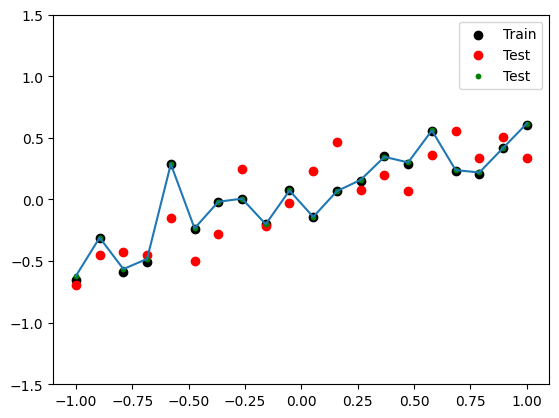

In [75]:
plt.figure()
plt.scatter(x=X_train, y=y_train, c= 'black', label='Train')
plt.scatter(x=X_test, y=y_test, c= 'red', label='Test')
plt.scatter(x=X_test, y=y_pred, c= 'green', label='Test',s=10)

plt.plot(X_test, y_pred)
plt.legend()
plt.ylim((-1.5,1.5))
plt.show()

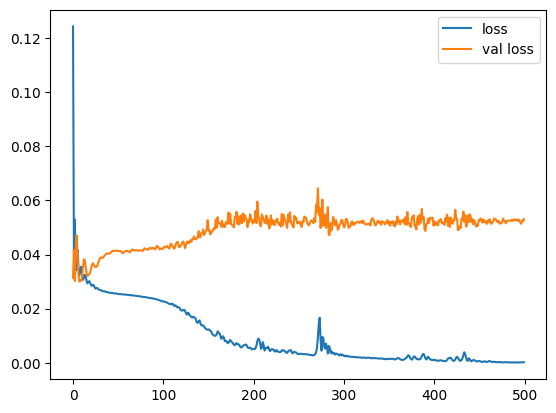

In [83]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# Dropout Model

In [113]:
model = Sequential()
model.add(Input(shape=(1,)))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(1, activation="linear"))
adam = Adam(learning_rate=0.01)
model.compile(loss='mse', optimizer=adam, metrics=['mse', 'mae'])
history = model.fit(X_train, y_train, epochs=500, 
                    validation_data = (X_test, y_test),
                    verbose=False)

In [114]:
# evaluate the model
_, train_mse, train_mae = model.evaluate(X_train, y_train, verbose=0)
_, test_mse, test_mae = model.evaluate(X_test, y_test, verbose=0)
print('Train: {}, Test: {}'.format(train_mse, test_mse))
print('Train: {}, Test: {}'.format(train_mae, test_mae))

Train: 0.025120651349425316, Test: 0.042433153837919235
Train: 0.13035288453102112, Test: 0.1621149182319641


In [115]:
y_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


In [116]:
print(y_pred.flatten().tolist())

[-0.5338581800460815, -0.4457404911518097, -0.36011967062950134, -0.25715604424476624, -0.11786705255508423, -0.09125620126724243, -0.0896005779504776, -0.08716902136802673, -0.0830523669719696, -0.07168479263782501, -0.05168373882770538, 0.00955723226070404, 0.16130101680755615, 0.2877838909626007, 0.3220452666282654, 0.343389093875885, 0.36339661478996277, 0.3935418426990509, 0.4494852125644684, 0.5215675830841064]


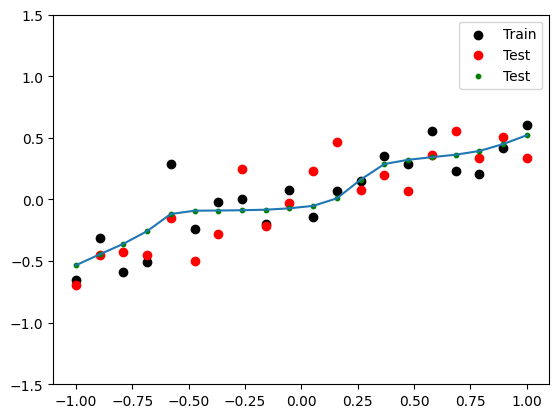

In [117]:
plt.figure()
plt.scatter(x=X_train, y=y_train, c= 'black', label='Train')
plt.scatter(x=X_test, y=y_test, c= 'red', label='Test')
plt.scatter(x=X_test, y=y_pred, c= 'green', label='Test',s=10)

plt.plot(X_test, y_pred)
plt.legend()
plt.ylim((-1.5,1.5))
plt.show()

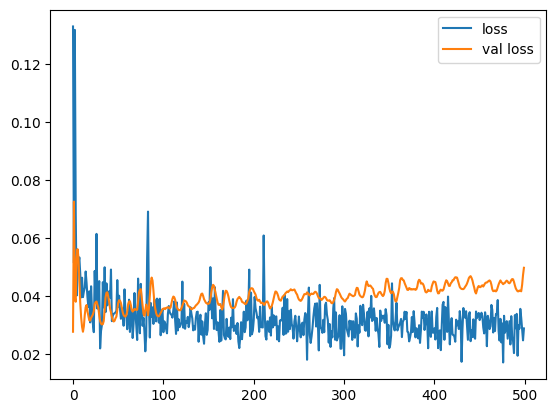

In [112]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()